In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Training Set:
Mean Squared Error: 6475.307642274186
R-squared: -6050.543534427913

Testing Set:
Mean Squared Error: 5783.36888367431
R-squared: -8041.109520645821


c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


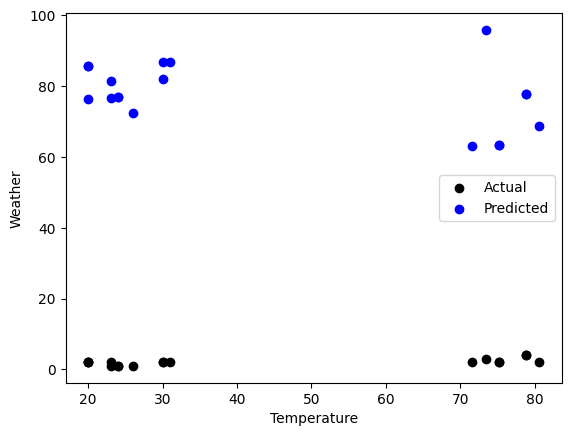

INFO:tensorflow:Assets written to: C:\Users\VANZ\AppData\Local\Temp\tmp8671skqf\assets


INFO:tensorflow:Assets written to: C:\Users\VANZ\AppData\Local\Temp\tmp8671skqf\assets


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Disable eager execution (only for TensorFlow 2.x)
tf.compat.v1.disable_eager_execution()

# Baca dataset
df = pd.read_csv('cuaca.csv')
# Label encoding untuk kolom 'Weather'
label_encoder = LabelEncoder()
df['Weather'] = label_encoder.fit_transform(df['Weather'])

# Pilih fitur dan target
X = df[['Hum', 'Temp']]
y = df['Weather']
# Bagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear (gunakan model dari Keras)
model = keras.Sequential([
    layers.Input(shape=(2,)),  # Jumlah fitur pada input layer
    layers.Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=100, verbose=0)  # Ubah epochs sesuai kebutuhan

# Lakukan prediksi pada set pelatihan dan set pengujian
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluasi model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print('Training Set:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')
print('\nTesting Set:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')

# Visualisasi hasil prediksi
plt.scatter(X_test['Temp'], y_test, color='black', label='Actual')
plt.scatter(X_test['Temp'], y_test_pred, color='blue', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Weather')
plt.legend()
plt.show()

# Save the TensorFlow model to a TFLite file
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('linear_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Baca dataset
df = pd.read_csv('cuaca.csv')
# Label encoding untuk kolom 'Weather'
label_encoder = LabelEncoder()
df['Weather'] = label_encoder.fit_transform(df['Weather'])

# Pilih fitur dan target
X = df[['Hum', 'Temp']]
y = df['Weather']
# Bagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear (gunakan model dari Keras)
model = keras.Sequential([
    layers.Input(shape=(2,)),  # Jumlah fitur pada input layer
    layers.Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=100, verbose=0)  # Ubah epochs sesuai kebutuhan

# Lakukan prediksi pada set pelatihan dan set pengujian
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluasi model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print('Training Set:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')
print('\nTesting Set:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')

# Visualisasi hasil prediksi
plt.scatter(X_test['Temp'], y_test, color='black', label='Actual')
plt.scatter(X_test['Temp'], y_test_pred, color='blue', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Weather')
plt.legend()
plt.show()

# Save the TensorFlow model to a TFLite file
model.save('linear_model.h5')  # Save Keras model
converter = tf.lite.TFLiteConverter.from_keras_model_file('linear_model.h5')
tflite_model = converter.convert()
with open('linear_model.tflite', 'wb') as f:
    f.write(tflite_model)


KeyboardInterrupt: 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('cuaca.csv')

# Select features and target
X = df[['Hum', 'Temp']]
y = df['Weather']

# One-hot encode the target
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)
one_hot_labels = to_categorical(encoded_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a linear regression model
model = Sequential()
model.add(Dense(3, input_dim=2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('linear_regression_model.tflite', 'wb') as f:
    f.write(tflite_model)



Epoch 1/100


ValueError: in user code:

    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5) and (None, 3) are incompatible
